# Classifying Fashion-MNIST

Now we will construct a simple neural network which will perform
classification of the
[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) data set.
Fashion MNIST is a replacement for 
[MNIST](http://yann.lecun.com/exdb/mnist/)
data set.

<img src='https://github.com/udacity/deep-learning-v2-pytorch/blob/master/intro-to-pytorch/assets/fashion-mnist-sprite.png?raw=1' width=500px>


In [ ]:
# Set of helper function to help our work
! wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

# Install pytorch if required
! pip install torch
! pip install torchvision

--2019-11-02 21:39:27--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py.2’

helper.py.2         100%[===================>]   2.75K  --.-KB/s    in 0s      

2019-11-02 21:39:27 (59.7 MB/s) - ‘helper.py.2’ saved [2813/2813]



In [ ]:
import torch
from torchvision import datasets, transforms
from torch import nn
from torch import optim
import matplotlib.pyplot as plt
%matplotlib inline
import helper

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
title_order = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle Boot'
]

label_decoder = dict(zip(range(10), title_order))
label_encoder = {v: k for k, v in label_decoder.items()}

In [ ]:
# Perform normalization
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))])
# Download and load the train data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Prikazujemo sliku.

T-shirt/top


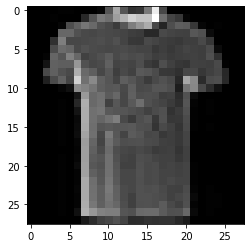

In [ ]:
image_batch, label = next(iter(trainloader))
label_ix = label[0].item()
image = image_batch[0, :]
print(label_decoder[label_ix])

# squeeze converts (1, 28, 28) into (28, 28),
# which means, it removes all dimensions of size 1
plt.imshow(image.squeeze(), cmap='gray')

## Defining our neural network

This is where we will define our network. Images are $28 \times 28$,
which gives $784$ pixels per image, with 10 different classes.

In [ ]:
class FashionMnistNN_v1(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = nn.functional.relu(x, inplace=True)
        x = self.fc2(x)
        x = nn.functional.log_softmax(x, dim=1)
        return x

class FashionMnistNN_v2(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = nn.functional.relu(x, inplace=True)
        x = self.fc2(x)
        return x

In [ ]:
model = nn.Sequential(
    # Linear transformation converts a shape of (batch_size, 784)
    # into output (batch_size, 128).
    nn.Linear(784, 128),
    # Performs a ReLU activation after linear transformation.
    nn.ReLU(),

    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    
    # Perform softmax and take the log of the values.
    # Log is taken to help with numerical stability.
    nn.LogSoftmax(dim=1)
)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [ ]:
# TODO: Create the network, define the criterion and optimizer
model = model.to(device)
# model.cuda()
optimizer = optim.Adam(model.parameters())
criterion = nn.NLLLoss()

In [ ]:
%%time
# TODO: Train the network here
epochs = 5
losses = []

for epoch in range(epochs):
    # Iterate batch by batch
    running_loss = 0
    for images, labels in trainloader:
        # Flatten the images
        images = images.to(device)
        images = images.view(images.shape[0], -1)
        labels = labels.to(device)
        
        # Calculate predictions and loss
        logprobs = model.forward(images)
        loss = criterion(logprobs, labels)
        
        # Update gradients
        optimizer.zero_grad()
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        running_loss += loss.item()

    print('[{}/{}]: Loss: {}'.format(epoch + 1, epochs, running_loss))
    losses.append(running_loss)

[1/5]: Loss: 488.4336212426424
[2/5]: Loss: 359.33583876490593
[3/5]: Loss: 323.1483301073313
[4/5]: Loss: 298.8682597577572
[5/5]: Loss: 280.9841764718294
CPU times: user 1min 4s, sys: 402 ms, total: 1min 4s
Wall time: 1min 5s


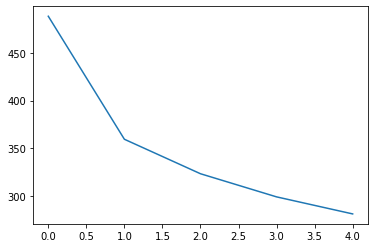

In [ ]:
plt.plot(range(epochs), losses)

In [ ]:
model = FashionMnistNN_v1().to(device)
optimizer = optim.Adam(model.parameters())
criterion = nn.NLLLoss()

In [ ]:
%%time
# TODO: Train the network here
epochs = 5
losses = []

for epoch in range(epochs):
    # Iterate batch by batch
    running_loss = 0
    for images, labels in trainloader:
        # Flatten the images
        images = images.to(device)
        images = images.view(images.shape[0], -1)
        labels = labels.to(device)
        
        # Calculate predictions and loss
        logprobs = model.forward(images)
        loss = criterion(logprobs, labels)
        
        # Update gradients
        optimizer.zero_grad()
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        running_loss += loss.item()

    print('[{}/{}]: Loss: {}'.format(epoch + 1, epochs, running_loss))
    losses.append(running_loss)

[1/5]: Loss: 470.5724892318249
[2/5]: Loss: 354.2623184323311
[3/5]: Loss: 321.66594064980745
[4/5]: Loss: 297.8205808028579
[5/5]: Loss: 280.53099643439054
CPU times: user 1min 1s, sys: 377 ms, total: 1min 1s
Wall time: 1min 2s


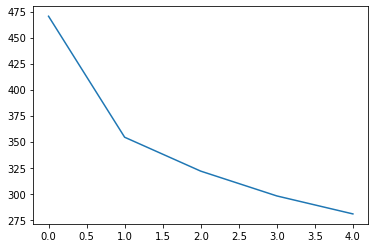

In [ ]:
plt.plot(range(epochs), losses)

In [ ]:
model = FashionMnistNN_v2().to(device)
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

In [ ]:
%%time
# TODO: Train the network here
epochs = 5
losses = []

for epoch in range(epochs):
    # Iterate batch by batch
    running_loss = 0
    running_corrects = 0
    for images, labels in trainloader:
        # Flatten the images
        images = images.to(device)
        images = images.view(images.shape[0], -1)
        labels = labels.to(device)
        
        # Calculate predictions and loss
        activations = model.forward(images)
        loss = criterion(activations, labels)
        
        # Update gradients
        optimizer.zero_grad()
        loss.backward()
        
        softmax_vector = nn.functional.softmax(activations)
        # print(activations.shape)
        # print(labels.data.shape)
        # print(softmax_vector.shape)
        # print(softmax_vector)
        softmax_ix = softmax_vector.argmax(dim=1)
        # print(softmax_ix.shape)
        
        running_corrects += torch.sum(softmax_ix == labels.data)
        # print(torch.sum(softmax_ix == labels.data)) 
        
        # Update parameters
        optimizer.step()
        
        running_loss += loss.item()

    train_acc = running_corrects.float() / len(trainset)
    print('[{}/{}]: Loss: {} Acc: {}'.format(epoch + 1, epochs, running_loss, train_acc))
    losses.append(running_loss)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[1/5]: Loss: 468.80149053037167 Acc: 0.8211833238601685
[2/5]: Loss: 358.76784896850586 Acc: 0.8598833680152893
[3/5]: Loss: 324.5759779959917 Acc: 0.8736166954040527
[4/5]: Loss: 299.20042933523655 Acc: 0.8826000094413757
[5/5]: Loss: 283.71231558918953 Acc: 0.8891167044639587
CPU times: user 1min 2s, sys: 397 ms, total: 1min 2s
Wall time: 1min 3s


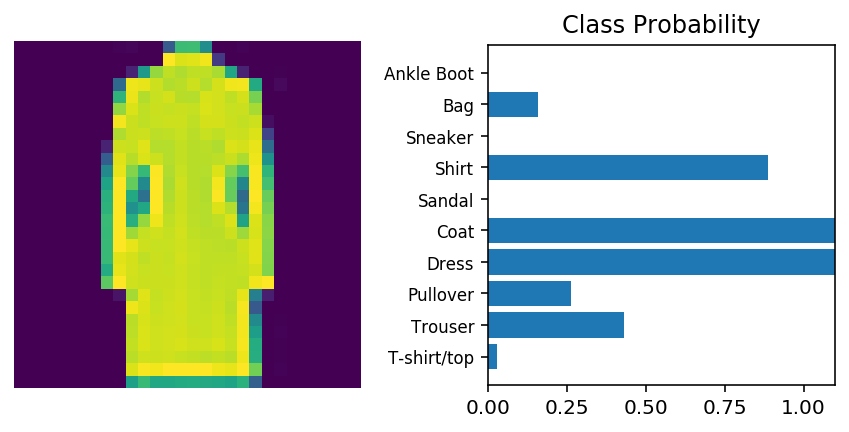

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)

img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img

ps = model.forward(img)
ps = torch.exp(ps).to('cpu')
img = img.to('cpu')

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')